# Depositar statistic

<h3> important data:

*   o_dataset : 所有dataset的資料
*   o_project :  所有project的資料
*   o_topic  :   所有topic的資料
</h3>


In [25]:

!curl -L -o TaipeiSansTCBeta-Regular.ttf "https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download"
!apt-get install gzip
import matplotlib as mpl
import matplotlib.pyplot as plt
import subprocess
import gzip
import json
import requests
from matplotlib.font_manager import fontManager
from collections import Counter

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')



/bin/bash: warning: setlocale: LC_ALL: cannot change locale (zh_CN.UTF-8)
E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


<h1>Get all dataset properties</h1>
<p>

In [26]:
# Set the command
cmd = [  # for package
    'ckanapi',
    'search',
    'datasets',
    '-O',
    'datasets.jsonl.gz',
    '-z',
    '-r',
    'https://data.depositar.io'
]

# Execute the command
subprocess.run(cmd, check=True)

o_dataset = []


with gzip.open("datasets.jsonl.gz", "rb") as f_in:
    with open("datasets.jsonl", "wb") as f_out:
        f_out.write(f_in.read())
with open("datasets.jsonl", "r") as f: #游標位置會變
    line_count = 0
    for line in f:
      line_count += 1
    f.seek(0) #讓游標讀取位置回到原點
    for i in range(line_count):
        line = f.readline()
        data = json.loads(line)
        o_dataset.append(data)
print(o_dataset[:2])

/home/weipo/.local/lib/python3.10/site-packages/ckanapi/cli/search.py:63: FutureWarning: GzipFile was opened for writing, but this will change in future Python releases.  Specify the mode argument for opening it for writing.
  jsonl_output = gzip.GzipFile(fileobj=jsonl_output)


[{'author': '安倉營造股份有限公司', 'author_email': None, 'contact_email': 'ecowindow168@gmail.com', 'contact_person': '林彥伶', 'creator_user_id': '3f15bfe9-364a-4b5e-b9dc-08b686503e44', 'data_type': ['doc'], 'groups': [], 'id': 'dd2f0661-a975-4d2f-931c-12637337ff34', 'isopen': False, 'keywords': [], 'language': [], 'license_id': 'notspecified', 'license_title': 'License Not Specified', 'maintainer': None, 'maintainer_email': None, 'metadata_created': '2023-08-07T07:32:54.725418', 'metadata_modified': '2023-08-07T07:47:55.883531', 'name': '8c1a4', 'notes': '工程準備階段生態檢核報告', 'num_resources': 2, 'num_tags': 0, 'organization': None, 'private': False, 'process_step': '', 'relationships_as_object': [], 'relationships_as_subject': [], 'remarks': '', 'resources': [{'cache_last_updated': None, 'cache_url': None, 'created': '2023-08-07T07:34:16.845995', 'datastore_active': False, 'datastore_contains_all_records_of_source_file': False, 'description': '', 'format': 'PDF', 'hash': '', 'id': '84d04205-f237-4fe9-

<h1> get all project properties(1min)</h1>

In [4]:
# cmd = [  # for package
#     'ckanapi',
#     'dump',
#     'organizations',
#     '--all',
#     '-O',
#     'projects.jsonl.gz',
#     '-z',
#     '-r',
#     'https://data.depositar.io'
# ]

# subprocess.run(cmd, check=True)

# o_project = []

# with gzip.open("projects.jsonl.gz", "rb") as f_in:
#     with open("projects.jsonl", "wb") as f_out:
#         f_out.write(f_in.read())
# with open("projects.jsonl", "r") as f: #游標位置會變
#     line_count = 0
#     for line in f:
#       line_count += 1
#     f.seek(0) #讓游標讀取位置回到原點
#     for i in range(line_count):
#         line = f.readline()
#         data = json.loads(line)
#         o_project.append(data)


<h1>get all topic </h1>
<p></p>

In [27]:
# Set the command
cmd = [  # for package
    'ckanapi',
    'dump',
    'groups',
    '--all',
    '-O',
    'topics.jsonl.gz',
    '-z',
    '-r',
    'https://data.depositar.io'
]
# Execute the command
completed_process = subprocess.run(cmd, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)

o_topic = []


with gzip.open("topics.jsonl.gz", "rb") as f_in:
    with open("topics.jsonl", "wb") as f_out:
        f_out.write(f_in.read())
with open("topics.jsonl", "r") as f: #游標位置會變
    line_count = 0
    for line in f:
      line_count += 1
    f.seek(0) #讓游標讀取位置回到原點
    for i in range(line_count):
        line = f.readline()
        data = json.loads(line)
        o_topic.append(data)



<h1> largest author</h1>
<p></p>

[('高雄市政府水利局、科進栢誠工程顧問股份有限公司', 117), ('中央研究院人社中心GIS專題中心：台灣歷史文化地圖', 116), ('嘉義縣政府', 99), ('6456', 95), ('逢甲大學水利發展中心', 77), ('6458', 63), ('逢甲大學', 44), ('磐誠工程顧問股份有限公司', 44), ('samson', 37), ('Linda Chang', 37)]


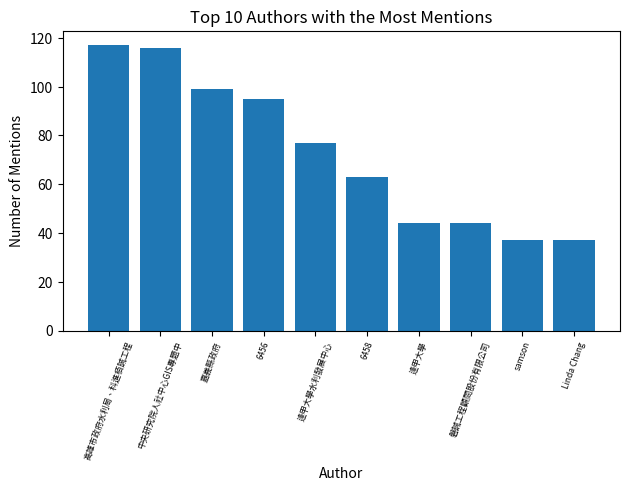

In [28]:
import warnings
warnings.filterwarnings("ignore")
author = []
for i in o_dataset[:-1]: # 最後一個沒有作者
  author.append(i['author'])
author_counts = Counter(author)

top_authors = author_counts.most_common(10)
print(top_authors)
top_authors_names = [i[0][:15] for i in top_authors]
top_authors_mentions = [i[1] for i in top_authors]


plt.bar(top_authors_names, top_authors_mentions)
plt.xlabel('Author')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=70,fontsize=6)
plt.tight_layout()
plt.title('Top 10 Authors with the Most Mentions')

plt.show()
# 可以再做一個比例圓餅圖
## 得知現在的作者有誰



<h1>Largest tags : </h1>

<p>秀出被使用最多次的tag還有使用次數</p>

{'生態檢核': 208, '高雄市': 142, 'playaround workshop': 38, 'UAV': 36, '台江國家公園': 35, 'UAS': 33, '前瞻水環境建設': 29, '論文': 25, '水與安全計畫': 24, 'LTSER': 21}


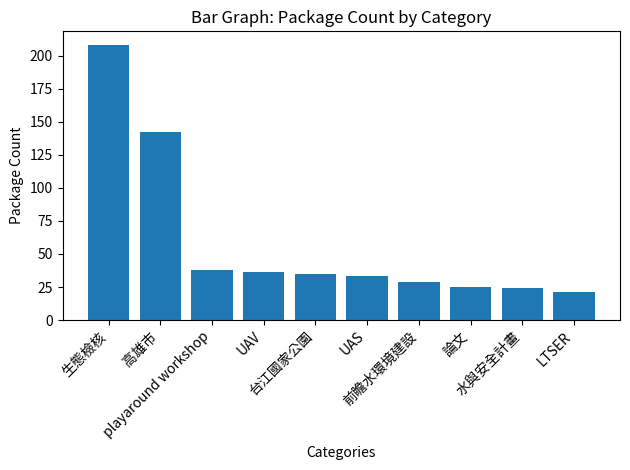

In [29]:
url = "http://data.depositar.io/api/3/action/package_search?facet.field=[%22tags%22]&facet.limit=10"
package_list = requests.get(url).json()

tag_number =  package_list['result']['facets']['tags']
values = tag_number.values()
labels = tag_number.keys()
print(tag_number)
plt.bar(labels, values)
plt.xlabel('Categories')
plt.ylabel('Package Count')
plt.title('Bar Graph: Package Count by Category')
plt.xticks(rotation=45, ha='right')  # To rotate the labels for better readability
plt.tight_layout()  # To prevent label cutoff
plt.show()


<h1> largest topics</h1>
<br>#include tags也做得到
<br>#Returning a list of packages is too expensive, 要顯現出該topic有什麼資料集是做不到的事情

[{'name': 'thcts', 'package_count': 115}, {'name': 'geography-and-places', 'package_count': 64}, {'name': 'natural-and-physical-sciences', 'package_count': 57}, {'name': 'society-and-social-sciences', 'package_count': 54}, {'name': 'eco-check', 'package_count': 51}, {'name': 'society', 'package_count': 45}, {'name': 'uas-observation', 'package_count': 40}, {'name': 'biota', 'package_count': 32}, {'name': 'oceans', 'package_count': 24}, {'name': 'farming', 'package_count': 18}, {'name': 'general-reference', 'package_count': 15}, {'name': 'culture-and-the-arts', 'package_count': 12}, {'name': 'economy', 'package_count': 12}, {'name': 'climatology-meteorology-atmosphere', 'package_count': 11}, {'name': 'human-activities', 'package_count': 10}, {'name': 'geoscientific-information', 'package_count': 10}, {'name': 'environment', 'package_count': 10}, {'name': 'religion-and-belief-systems', 'package_count': 9}, {'name': '14-climate-change', 'package_count': 9}, {'name': 'asian-soundscape-moni

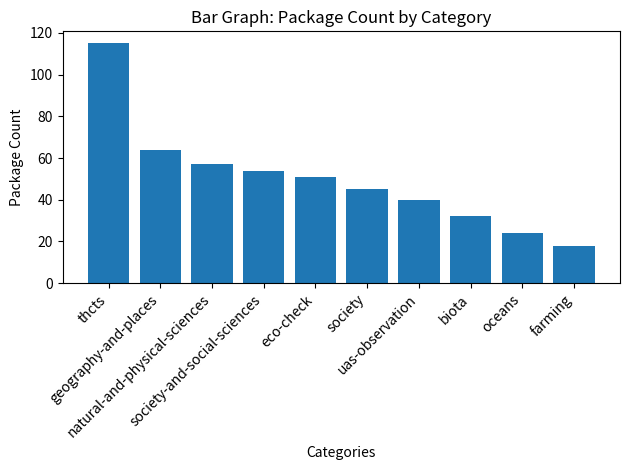

In [30]:

unsort_topic = []
for i in o_topic:
  unsort_topic.append({'name': i['name'], 'package_count': i['package_count']})

topic = sorted(unsort_topic, key=lambda x: x['package_count'],reverse=True)
values = [item['package_count'] for item in topic[:10]]
labels = [item['name'] for item in topic[:10]]
print(topic)

plt.bar(labels, values)
plt.xlabel('Categories')
plt.ylabel('Package Count')
plt.title('Bar Graph: Package Count by Category')
plt.xticks(rotation=45, ha='right')  # To rotate the labels for better readability
plt.tight_layout()  # To prevent label cutoff
plt.show()



<h1>largest type</h1>
<br> problem of undefined needs to be solved <br>

[('PDF', 1085), ('SHP', 130), ('undefined', 121), ('CSV', 100), ('JPEG', 99), ('HTML', 50), ('KML', 39), ('WMTS', 33), ('PNG', 15), ('KMZ', 14), ('XLSX', 12), ('lost', 11), ('DOC', 9), ('XML', 9), ('DOCX', 7), ('TIFF', 7), ('ZIP', 6), ('.PDF', 6), ('ODS', 6), ('geotif', 6), ('TIF', 6), ('.xlsx', 5), ('RAR', 5), ('external resources', 5), ('audio/x-wav', 5), ('PPTX', 4), ('.docx', 3), ('mat', 3), ('XLS', 3), ('TXT', 3), ('dBase', 3), ('CPG', 3), ('image/heic', 2), ('.jpg', 2), ('QGIS', 2), ('PPT', 2), ('ipynb', 1), ('warc', 1), ('python', 1), ('tif', 1), ('.zip', 1), ('website', 1), ('application/x-7z-compressed', 1), ('application/vnd.rar', 1), ('WARC', 1), ('ODT', 1), ('gtm', 1), ('GIF', 1), ('RAW', 1), ('GZ', 1), ('JSON', 1), ('WAV', 1), ('WMS', 1), ('geotiff', 1), ('ECW', 1)]
1840


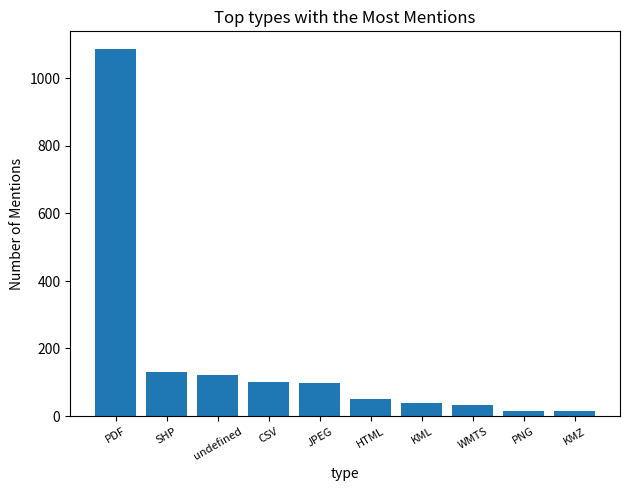

In [31]:
types = []

for j in o_dataset:
  if j['resources']:
      if j['resources'][0]['format']=='':
        types.append('undefined')
      elif j['resources'][0]['format']==".pdf":
        types.append('PDF')
      else:
        types.append(j['resources'][0]['format'])
  else:
      types.append('lost')

type_counts = Counter(types)
all_top_type = type_counts.most_common(120)
top_type = type_counts.most_common(10)

print(all_top_type)
all_top_type_mentions = [i[1] for i in all_top_type]
print(sum(all_top_type_mentions))

top_name = [i[0] for i in top_type]
top_type_mentions = [i[1] for i in top_type]

plt.bar(top_name, top_type_mentions)
plt.xlabel('type')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=30,fontsize=8)
plt.tight_layout()
plt.title('Top types with the Most Mentions')

plt.show()

<h1>搜尋tag中是wikidata關鍵字</h1>
<h3>it spends 7 minutes to run through the whole tags</h3>


In [32]:
from wikidataintegrator import wdi_core


def is_tag_in_wikidata(tag):
    sparql_query = []
    if type_word(tag[0])=="En":
      sparql_query = f'SELECT ?item WHERE {{ ?item rdfs:label "{tag}"@en }}'
    elif type_word(tag[0])=="CH":
      sparql_query = f'SELECT ?item WHERE {{ ?item rdfs:label "{tag}"@zh. }}'
    else:
      sparql_query = f'''
          SELECT ?item WHERE {{
              {{ ?item rdfs:label "{tag}"@en. }}
              UNION
              {{ ?item rdfs:label "{tag}"@zh-TW. }} }} '''

    result = wdi_core.WDItemEngine.execute_sparql_query(sparql_query) #executes the SPARQL query

    if result['results']['bindings']:
        return True
    else:
        return False

def type_word(word):

    ascii_code = ord(word)
    if (65 <= ascii_code <= 90 or 97 <= ascii_code <= 122):
        return "En"
    elif (48 <= ascii_code <= 57):
      return "num"
    return "CH"


比較最常用的tag 是否有在wikidata中出現

In [33]:
url = "http://data.depositar.io/api/3/action/package_search?facet.field=[%22tags%22]&facet.limit=10"
package_list = requests.get(url).json()

tag_number =  package_list['result']['facets']['tags']
tag_list = list(tag_number.items())
tag_list_keys  = list(tag_number.keys())
filter_tags = [tag for tag in tag_number if is_tag_in_wikidata(tag)]


def compare(list1,list2):
  set1 = set(list1)
  set2 = set(list2)

  common_set = set1.intersection(set2)
  diff_set = set1.difference(set2)

  return common_set,diff_set

intersect,differ = compare(tag_list_keys,filter_tags)
print("重複出現",intersect)
print("需要補充",differ)


重複出現 {'UAV', '高雄市', '論文', '台江國家公園', 'UAS'}
需要補充 {'前瞻水環境建設', '生態檢核', 'LTSER', 'playaround workshop', '水與安全計畫'}


<h1> update among a week (package) </h1>


[{'time': '2023-08-07T07:47:56.100676', 'title': '二重疏洪道左岸加高工程'}, {'time': '2023-08-07T07:34:18.572114', 'title': '二重疏洪道左岸加高工程'}, {'time': '2023-08-07T07:34:17.223315', 'title': '二重疏洪道左岸加高工程'}, {'time': '2023-08-07T07:32:54.919566', 'title': '二重疏洪道左岸加高工程'}, {'time': '2023-08-07T06:08:10.376170', 'title': '112年雲林縣麥寮合作社氣候資料'}, {'time': '2023-08-07T06:07:22.296743', 'title': '112年雲林縣麥寮合作社氣候資料'}, {'time': '2023-08-07T06:05:36.779098', 'title': '112年雲林縣麥寮合作社氣候資料'}, {'time': '2023-08-07T06:04:52.701729', 'title': '112年雲林縣麥寮合作社氣候資料'}, {'time': '2023-08-07T06:04:39.381408', 'title': '112年雲林縣麥寮合作社氣候資料'}, {'time': '2023-08-07T06:04:02.325331', 'title': '112年雲林縣麥寮合作社氣候資料'}, {'time': '2023-08-07T06:03:56.048527', 'title': '112年雲林縣麥寮合作社氣候資料'}, {'time': '2023-08-07T06:03:18.249969', 'title': '112年雲林縣麥寮合作社氣候資料'}, {'time': '2023-08-07T06:02:45.588216', 'title': '112年雲林縣麥寮合作社氣候資料'}, {'time': '2023-08-07T06:01:47.060401', 'title': '112年雲林縣麥寮合作社氣候資料'}, {'time': '2023-08-07T01:58:19.451660', 'title': '雲林鄉鎮

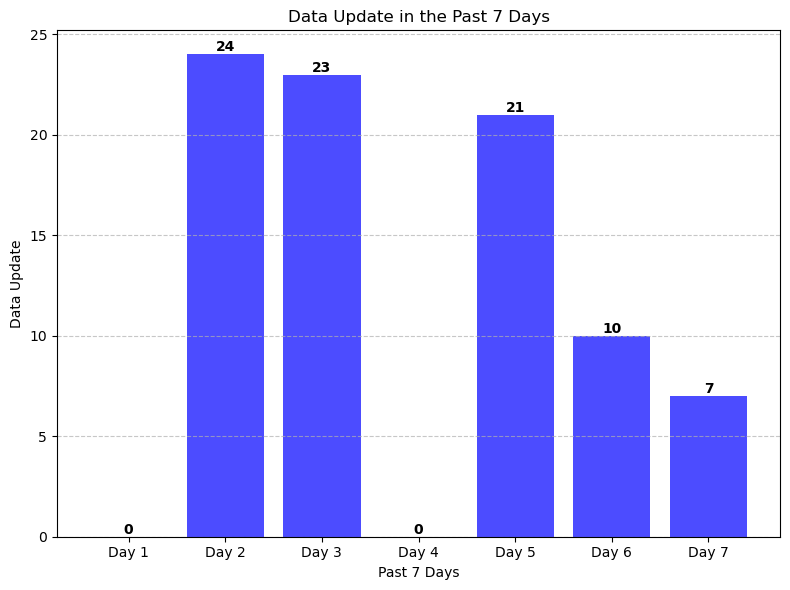

In [12]:
from datetime import datetime, timedelta
import pytz

url = "http://data.depositar.io/api/3/action/recently_changed_packages_activity_list?limit=100"
package_list = requests.get(url).json()
up_time = package_list['result']
day = 7
time_list = []
each_d_up = [0]*day

for i in up_time:
  time_list.append({'time':i['timestamp'],'title':i['data']['package']['title']})

def time_in_7d(time_list,each_d_up):
    tz = pytz.timezone("Asia/Taipei")
    current_tz = datetime.now(tz)
    current_time = str(current_tz.replace(tzinfo=None))
    current_date = datetime.fromisoformat(current_time)

    filter_time = []

    for i in time_list:
      time = datetime.fromisoformat(i['time'])
      if current_date - time <= timedelta(days=day):
        filter_time.append(i)
        for j in range(day):
          if  (current_date - time >= timedelta(days=j)) and (current_date - time <= timedelta(days=j+1)):
            each_d_up[j] = each_d_up[j] + 1
    return filter_time


days_7 = time_in_7d(time_list,each_d_up)
print(days_7)
print(each_d_up)




def create_dynamic_list(day):
    return [f'Day {i}' for i in range(1, day + 1)]
days = create_dynamic_list(day)
print(days)
# Convert the data indices to numerical range for plotting


# Create the bar graph
plt.figure(figsize=(8, 6))
plt.bar(range(day), each_d_up, color='b', alpha=0.7)

# Add labels to the bars
for i, value in enumerate(each_d_up):
    plt.text(i, value, str(value), ha='center', va='bottom', fontweight='bold')

# Customize the plot
plt.xticks(range(day), days)
plt.xlabel(f'Past {day} Days')
plt.ylabel('Data Update')
plt.title(f'Data Update in the Past {day} Days')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

<h1> average number of form fields which have data</h1>

**基本資訊:**
標題 網址 摘要 資料類型 Wikidata 關鍵字 標籤 語言 備註(都有)

**時空資訊:**
時間解析度 起始時間 結束時間 空間範圍 空間範圍.X.min 空間範圍.X.max 空間範圍.Y.min 空間範圍.Y.max 空間解析度

**管理資訊:** 授權 產製者 資料產製時間 資料處理歷程 專案 聯絡人 聯絡人的電子郵件(都有)

**資源層級:**
網址 名稱 摘要 字元編碼 座標參考系統 格式 (沒看到字元編碼和座標參考系統)

In [34]:
#  basic: i['title'] i['url'] i['notes'] i['data_type'] i['keywords'] i['tags'] i['language'] i['remarks']
#  time: i['temp_res'] i['start_time'] i['end_time'] i['spatial'] i['x_min'] i['x_max'] i['y_min'] i['y_max'] i['spatial_res']
#  manage:  i['resources'][0]['created']  i['owner_org]-- some do not have this
#  resources: i['url'] i['name']  i['organization']['description']也有要先check  i['resources'][0]['format']要額外處理

basic_field = ['title','url','notes','data_type','keywords','tags','langauge','remarks']
manage_field = ['license_id','author','process_step','contact_person','contact_email','owner_org']
time_field = ['temp_res','start_time','end_time','spatial','x_min','x_max','y_min','y_max','spatial_res']
resource_field = ['url','name']

total = 0
count_basic = 0
count_manage = 0
count_time = 0
count_re = 0

for i in o_dataset:  #基本資訊
  total += 1
  count_basic += sum(1 for field in basic_field if i.get(field) is not None and i[field]!='') #有時不會有欄位，先確保有欄位再拿值

percent_basic = (count_basic / total) / 8
print('average of basic',round(count_basic/total,2),'   percent of basic:', round(percent_basic*100, 2), "%")


for i in o_dataset:  #管理資訊
  count_manage += sum(1 for field in basic_field if i.get(field) is not None and i[field]!='')
  if i['resources']:
    count_manage += (1 if i['resources'][0]['created'] !='' else 0)

percent_manage = (count_manage / total) / 7
print('average of manage',round(count_manage/total,2),'   percent of manage:', round(percent_manage*100, 2), "%")

for i in o_dataset:  #時空資訊
  count_time += sum(1 for field in time_field if i.get(field) is not None and i[field]!='')

percent_time = (count_time / total) / 9
print('average of time',round(count_time/total,2),'   percent of time:', round(percent_time*100, 2), "%")

for i in o_dataset: #資源層級

  count_re += sum(1 for field in resource_field if i.get(field) is not None and i[field]!='')
  if i['resources']:
    count_re += (1 if i['resources'][0]['format'] !='' else 0)
  if i['organization']:
    count_re += (1 if i['organization']['description'] !='' else 0)

percent_re = (count_re / total) / 4
print('average of resource',round(count_re/total,2),'   percent of resource:', round(percent_re*100, 2), "%")

total_data = count_basic + count_manage + count_time + count_re
percent_total = (total_data / total) / 28
print('average',round(total_data/total,2),'   percent:', round(percent_total*100, 2), "%")

average of basic 4.83    percent of basic: 60.37 %
average of manage 5.82    percent of manage: 83.19 %
average of time 2.02    percent of time: 22.42 %
average of resource 2.72    percent of resource: 68.0 %
average 15.39    percent: 54.97 %


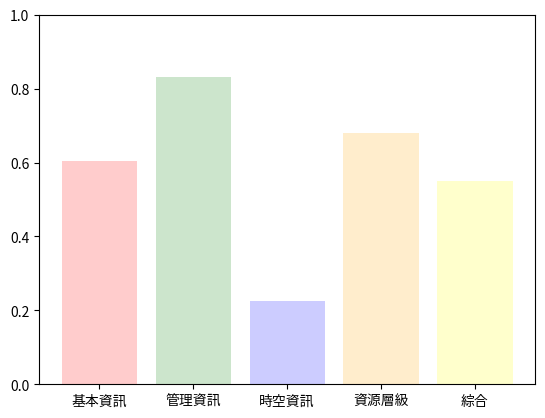

In [35]:
data = [percent_basic,percent_manage,percent_time,percent_re,percent_total]

x = range(len(data))

fig, ax = plt.subplots()
ax.bar(x, data, color=['red', 'green', 'blue','orange', 'yellow'], alpha=0.2)
ax.set_xticks(x)
ax.set_xticklabels(['基本資訊', '管理資訊','時空資訊', '資源層級', '綜合'])
ax.set_ylim(0, 1)

plt.show()


<h1>largest project</h1>
<p></p>

In [15]:

# count_pro = 0
# top_project = []

# for i in o_project:
#   count_pro += 1
#   top_project.append({'display_name':i['display_name'],'packages':i['package_count']})

# sort_project = sorted(top_project,key=lambda x:x['packages'],reverse=True)
# pro_values = [i['packages']for i in sort_project[:10]]
# pro_labels = [i['display_name'][:15] for i in sort_project[:10]]
# print(sort_project[:10])
# plt.bar(pro_labels,pro_values )
# plt.xlabel('type')
# plt.ylabel('Number of project')
# plt.xticks(rotation=80,fontsize=8)
# plt.tight_layout()
# plt.title('Top projects ')

# plt.show()

<h1>Spatial coverage</h1>
<p></p>

In [16]:
time_field = ['temp_res','start_time','end_time','spatial','x_min','x_max','y_min','y_max','spatial_res']

spatial = []

for i in o_dataset:  #時空資訊
  temp = {key: None for key in time_field}
  for field in time_field:
    temp[field]=i[field] if i.get(field) is not None else ''  #有時不會有欄位，先確保有欄位再拿值
  spatial.append(temp)


temp_res = [i['temp_res'] for i in spatial]  #時間解析度
temp_res_count = Counter(temp_res)
new_temp_res_count = Counter({k if k != "" else "undefined": v for k, v in temp_res_count.items()})
print('時空解析度',new_temp_res_count)

start_time = [i['start_time'][:4] for i in spatial]  # 開始時間 抓年份而已
start_time_count = Counter(start_time)
new_start_time_count = Counter({k if k != "" else "undefined": v for k, v in start_time_count.items()})
print('起始時間',new_start_time_count)

end_time = [i['end_time'][:4] for i in spatial]  # 結束時間
end_time_count = Counter(end_time)
new_end_time_count = Counter({k if k != "" else "undefined": v for k, v in end_time_count.items()})
print('結束時間',new_end_time_count)

during = []      #一個專案通常多久
for i in spatial:
  if i['start_time'] != '' and i['end_time'] != '':
    during.append(int(i['end_time'][:4])-int(i['start_time'][:4]))
during_time_count = Counter(during)
new_during_time_count = Counter({k if k != "" else "undefined": v for k, v in during_time_count.items()})
print('持續時間',new_during_time_count)

ss = []       #spatial 中繪圖形狀
for i in spatial:
  if i['spatial']:
    new = json.loads(i['spatial'])
    ss.append(new['type'])
new_ss = Counter(ss)
print('標記形狀',new_ss)

locations = [] #經緯度
for i in spatial:
  if i['x_min'] and i['x_max'] and i['y_min'] and i['y_max']:
    x_avr = (float(i['x_min']) + float(i['x_max']))/2  #mean
    y_avr = (float(i['y_min']) + float(i['y_max']))/2
    locations.append({x_avr,y_avr})

print('經緯度',locations)

spatial_res = [i['spatial_res'] for i in spatial]  #時間解析度
spatial_res_count = Counter(spatial_res)
new_spatial_res_count = Counter({k if k != "" else "undefined": v for k, v in spatial_res_count.items()})
print('時間解析度',new_spatial_res_count)

時空解析度 Counter({'undefined': 1384, 'yearly': 283, 'daily': 110, 'monthly': 63})
起始時間 Counter({'undefined': 1295, '2019': 69, '2022': 50, '2021': 45, '2020': 43, '2018': 35, '2023': 25, '2012': 25, '2013': 16, '2014': 14, '2010': 13, '2008': 12, '2015': 12, '2009': 11, '2000': 11, '1926': 11, '2011': 10, '2017': 9, '1945': 9, '1624': 7, '1976': 7, '2001': 6, '1875': 5, '1895': 5, '1665': 5, '2016': 4, '1960': 4, '1661': 4, '1870': 3, '1975': 3, '1783': 3, '1912': 3, '1979': 3, '1900': 3, '1662': 3, '2002': 2, '2007': 2, '1961': 2, '2004': 2, '1793': 2, '1871': 2, '1840': 2, '1897': 2, '1736': 2, '1626': 2, '1644': 2, '1623': 2, '2005': 1, '1981': 1, '2003': 1, '2006': 1, '1995': 1, '1860': 1, '1967': 1, '1795': 1, '1877': 1, '1872': 1, '1874': 1, '1977': 1, '1980': 1, '1970': 1, '1932': 1, '1800': 1, '1723': 1, '1664': 1, '1654': 1, '1884': 1, '1935': 1, '1947': 1, '1974': 1, '1669': 1, '1782': 1, '1636': 1, '1652': 1, '1648': 1, '1640': 1, '1634': 1, '1629': 1, '1625': 1, '1999': 1})
結束

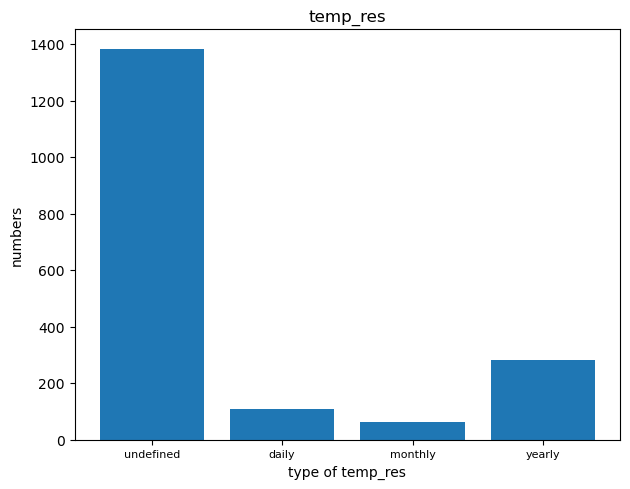

In [17]:

temp_res_k = [k for k,v in new_temp_res_count.items()]
temp_res_v = [v for k,v in new_temp_res_count.items()]

plt.bar(temp_res_k, temp_res_v)
plt.xlabel('type of temp_res')
plt.ylabel('numbers')
plt.xticks(fontsize=8)
plt.tight_layout()
plt.title('temp_res')

plt.show()

<h3> show出這些資料的位置 (會自動download file)</h3>
<p></p>

In [18]:
import folium
import ipywidgets as widgets
from IPython.display import display



upload_button = widgets.FileUpload()
display(upload_button)
# Sample list of locations
# Create a map centered at a specific location
map_center = (23.555,120.5)   # Choose any location as the map center
map_object = folium.Map(location=map_center, zoom_start=6)

locations = [tuple(loc) for loc in locations if len(loc) == 2]
# Add markers for each location on the map
for loc in locations:
    folium.Marker(loc).add_to(map_object)

# Save the map to an HTML file
map_file = "map.html"
map_object.save("map.html")

if upload_button.value:
    file_contents = upload_button.value[next(iter(upload_button.value))]['content']

FileUpload(value=(), description='Upload')

<h1> wikidata 關鍵字 </h1>

[{51, 'Taijiang Inner Sea'}, {49, 'Changhua County Government'}, {48, 'drainage system'}, {46, 'Taiwan'}, {'unmanned aerial vehicle', 46}, {'Forward-looking foundation construction plans in Taiwan', 34}, {'Tainan', 31}, {'Web Map Tile Service', 31}, {27, 'thesis'}, {'historical atlas', 24}]


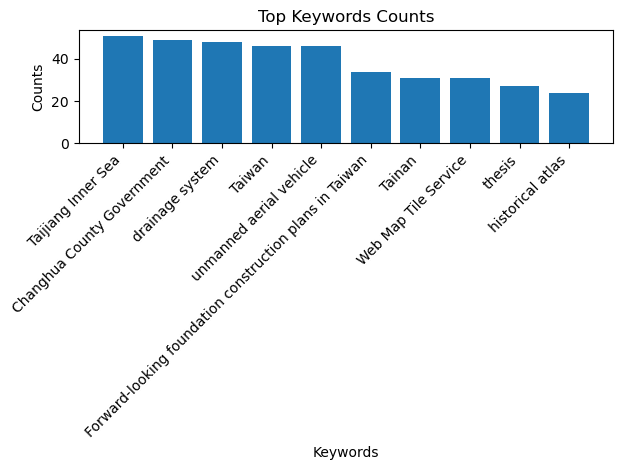

In [19]:
keywords = []

for i in o_dataset:
  if i.get('keywords') is not None:
    for j in i['keywords']:
      keywords.append(j)
keywords_count = Counter(keywords)
mostuse_key = keywords_count.most_common(10)

key_name = [i[0] for i in mostuse_key]
key_value = [i[1] for i in mostuse_key]

def find_word(list1):
  word_list = []
  for i in list1:
    endpoint_url = f"https://www.wikidata.org/wiki/Special:EntityData/{i}.json"
    response = requests.get(endpoint_url)
    if response.status_code == 200:
        data = response.json()
        # The label (name) of the entity will be available in the 'labels' section of the JSON response
        label = data['entities'][i]['labels']['en']['value']
        word_list.append(label)
    else:
        print("Error occurred:", response.text)
  return word_list

word_list = find_word(key_name)
key_value = [i[1] for i in mostuse_key]
wikidata = []
for i in range(len(word_list)):
  wikidata.append({word_list[i],key_value[i]})
print(wikidata)

plt.bar(word_list,key_value)
plt.xlabel('Keywords')
plt.ylabel('Counts')
plt.title('Top Keywords Counts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [20]:
url = "http://data.depositar.io/api/3/action/recently_changed_packages_activity_list?limit=100"
package_list = requests.get(url).json()
print(package_list)

{'help': 'https://data.depositar.io/api/3/action/help_show?name=recently_changed_packages_activity_list', 'success': True, 'result': [{'id': '1a077b38-730e-429c-b161-0d5faaf47b54', 'timestamp': '2023-08-07T07:47:56.100676', 'user_id': '3f15bfe9-364a-4b5e-b9dc-08b686503e44', 'object_id': 'dd2f0661-a975-4d2f-931c-12637337ff34', 'activity_type': 'changed package', 'data': {'package': {'title': '二重疏洪道左岸加高工程'}}}, {'id': 'a7eaf35f-f990-43e0-a78e-44324ee8d124', 'timestamp': '2023-08-07T07:34:18.572114', 'user_id': '3f15bfe9-364a-4b5e-b9dc-08b686503e44', 'object_id': 'dd2f0661-a975-4d2f-931c-12637337ff34', 'activity_type': 'changed package', 'data': {'package': {'title': '二重疏洪道左岸加高工程'}}}, {'id': '0016483d-85d5-430c-b7fb-f569e1f757d0', 'timestamp': '2023-08-07T07:34:17.223315', 'user_id': '3f15bfe9-364a-4b5e-b9dc-08b686503e44', 'object_id': 'dd2f0661-a975-4d2f-931c-12637337ff34', 'activity_type': 'changed package', 'data': {'package': {'title': '二重疏洪道左岸加高工程'}}}, {'id': '452be8a8-3983-4e0a-a37f-